## TESTING MONTE CARLO SIMULATIONS

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from IPython.display import display
from yahoo_fin import options
from yahoo_fin import stock_info as si
import scipy.optimize as scpo
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio
plt.style.use('default')
pio.templates.default = "seaborn"

from functions.BSpricer import BS_Pricer
from functions.MERTONpricer import Merton_pricer
from functions.KOUpricer import Kou_pricer
from functions.VGpricer import VG_pricer

np.random.seed(27)

In [2]:
T = 1  # Expiry Date in years
days = 252
paths = 5000
r = 0.03 # risk.free interest rate
q = 0
size = (days, paths)
exercise = 'european'

In [16]:
spx_data = pd.read_csv('data/sp500_data.csv')
print(spx_data.head())
bs_sigma = 0.1491  # [σ]

#mert_params = [0.1141, 0.42, -0.22, 0.3394]
# mert_params = [ 0.11156,  0.9275, -0.0795,  0.0848 ]
# mert_params = [0.0878, 0.9085, -0.118, 0.0963]  # [σ, λ, m, v]
#mert_params2 = [0.0713, 0.7368, -0.1748, 0.0]
#mert_params3 = [0.085, 0.912, -0.1226, 0.0936]       # calibrazione data 31/07/2023
#mert_params = [0.0909, 0.4634, -0.1892, 0.1374]     # calibrazione data 6/8/23
#mert_params = [0.0879, 0.4824, -0.196, 0.1228]
#mert_params = [0.0962, 0.2183, -0.3505, 0.0576]         # calibrazione data 6/8/23
#mert_params = [0.0967, 0.2132, -0.36, 0.1317]
#mert_params = [0.1009, 0.2026, -0.2832, 0.1202]         # calibrazione del 7/8/23 (CALL)
#mert_params = [0.1774, 1.1306, -0.13, 0.182]            # calibrazione 7/8/23 (PUT)
mert_params = [0.1267, 0.951, -0.1182, 0.2691]          # calibrazione 8/8/23 (PUT)

#kou_params = [0.21022, 0.04, 0.4, 0.0, 15.0]        # [σ, λ, p, η_1, η_2]
#kou_params = [0.0863, 1.2065, 0.4, 9.8519, 10.0]
# kou_params = [0.1233, 0.2608, 0.1961, 6.2507, 6.1967]
kou_params = [0.12, 0.4296, 0.2498, 13.0534, 6.5574]
# kou_params = [0.0932, 0.361, 0.2877, 3.5685, 4.2118]
# kou_params = [0.0976, 0.2195, 0.2574, 11.8654, 2.0341]    # ultima calibrazione data 31/07/2023
#kou_params = [0.0888, 0.2883, 0.2506, 12.04, 2.3913]
#kou_params = [0.1556, 1.1274, 0.3878, 14.3817, 4.4284] # calibrazione del 7/8/23 con weighted PUTS
kou_params = [0.1218, 1.2236, 0.3447, 7.6064, 4.7826]

# vg_params= [0.14575, 0.11985, 0.41850]
# vg_params = [0.2633, -0.1039, 0.0138]                   # [σ, θ, v]
vg_params = [0.151, 0.0107, 0.0909]  #### LAST CALIBRATION; GOOD
#vg_params = [0.1259, 0.1921, 0.3751]
#vg_params = [0.2458, 0.1976, 0.921] # calibrazione 7/8/23 PUTS


S0 = spx_data.loc[0, 'Close']
symbol = 'SPX'
#### Historical data from SPX Time Series (2016-2018)

         Date         Open         High          Low        Close      Volume   
0  2016-01-20  1876.180054  1876.180054  1812.290039  1859.329956  6416070000  \
1  2016-01-21  1861.459961  1889.849976  1848.979980  1868.989990  5078810000   
2  2016-01-22  1877.400024  1908.849976  1877.400024  1906.900024  4901760000   
3  2016-01-25  1906.280029  1906.280029  1875.969971  1877.079956  4401380000   
4  2016-01-26  1878.790039  1906.729980  1878.790039  1903.630005  4357940000   

    Returns  Log Returns  Returns (%)  
0       NaN          NaN          NaN  
1  1.005195     0.005182     0.519544  
2  1.020284     0.020081     2.028370  
3  0.984362    -0.015762    -1.563798  
4  1.014144     0.014045     1.414434  


In [17]:
otko_spx = pd.read_csv('data/otko_spx_1year.csv')

th_prices = pd.DataFrame({
    'K1': otko_spx['K1'],
    'K2': otko_spx['K2'],
    'Midpoint (%)': otko_spx['Midpoint (%)']
})

strikes = otko_spx[['K1', 'K2']].values / 100

### Black Scholes

(252, 5000)


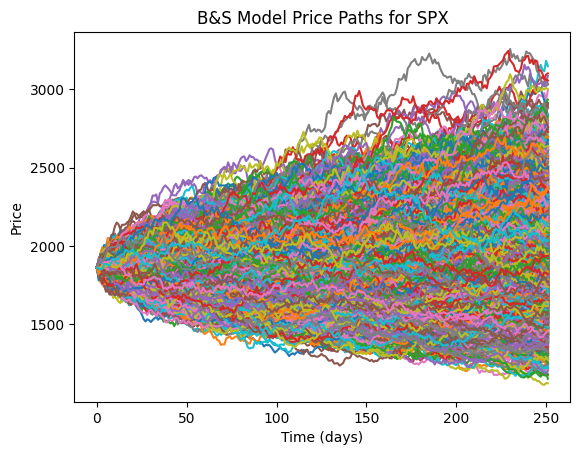

<Figure size 1000x600 with 0 Axes>

In [18]:
BS = BS_Pricer(S0, r, q, bs_sigma, T, exercise, None)
SBlackScholes = BS.BlackScholesPath(days, paths)
BS.plotBSPath(SBlackScholes, symbol)
print(SBlackScholes.shape)

### Merton

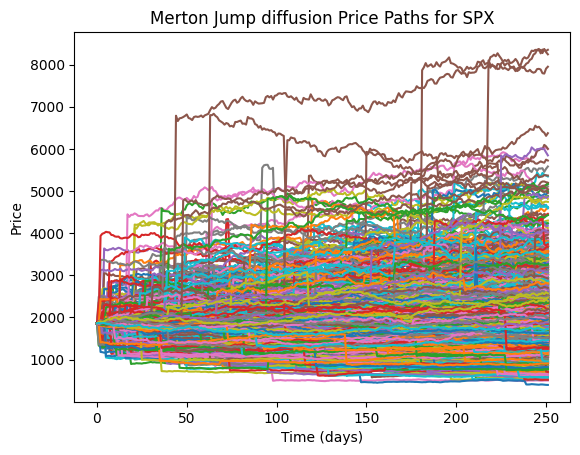

<Figure size 1000x600 with 0 Axes>

In [19]:
# #mert_params = [0.085, 0.912, -0.1226, 0.0936]
# #mert_params = [0.0909, 0.4634, -0.1892, 0.1374]
# mert_params = [0.0898, 0.4648, -0.1864, 0.1384]
MERT = Merton_pricer(S0, None, T, r, q, mert_params[0], mert_params[1], mert_params[2], mert_params[3], exercise)

SMerton = MERT.MertonPath(days, paths)
MERT.plotMertonPath(SMerton, symbol)  # Plot all paths

### Kou JD

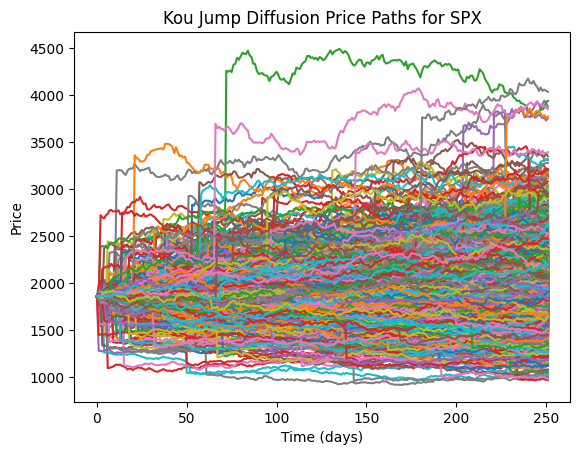

<Figure size 1000x600 with 0 Axes>

In [20]:
# #kou_params = [0.1247, 0.114, 0.3507, 2.4654, 10.0165]
# kou_params0 = [0.1447, 0.19, 0.4229, 2.15, 7.75]
# kou_params1 = [0.1047, 0.247, 0.383, 2.0013, 6.3471]
#kou_params = [0.1047, 0.2704, 0.3919, 2.25, 7.4077]
# kou_params3 = [0.0647, 0.19, 0.401, 2.25, 7.0253]
# kou_params =
#kou_params = [0.23, 7.04, 0.515, 13.072, 24.155]        # from TANKOV paper
#kou_params = [0.1247, 0.4346, 0.7228, 10.3, 5.5155]
#kou_params = [0.115, 0.4313, 0.5324, 10.3, 7.5159]
kou_params = [0.115, 0.4313, 0.5324, 12.3, 7.5159]


KOU = Kou_pricer(S0,None, T, r, kou_params[0], kou_params[1], kou_params[2], kou_params[3], kou_params[4], exercise)
SKou = KOU.KouPath(days, paths)

# Plot all paths
KOU.plotKouPath(SKou, symbol)

In [21]:
avg_final_value = SKou[-1,:].mean()
print(f'KOU Jump Diffusion SPX value after 252 days: {avg_final_value}')

# Pass one by one path to the otko_payoff function. Returns an array of size (paths)
avg_payoffs = []
for K1, K2 in strikes:
    payoffs = []        # stores here the payoff for each path, for a specific couple K1-K2
    for path in SKou.T:
        payoffs.append(KOU.payoff_otko(path,K1, K2))
    avg_payoffs.append(np.mean(payoffs))


kou_mc_prices = np.zeros(len(th_prices))
kou_prices_cf = np.zeros(len(th_prices))
for index in range(len(th_prices)):
    kou_mc_prices[index] = np.exp(-r*T)* avg_payoffs[index] * 100
for i, (K1, K2) in enumerate(zip(otko_spx['K1'].values, otko_spx['K2'].values)):
    kou_prices_cf[i] =KOU.closed_formula_otko(K1/100, K2/100)

th_prices['KOU CF (%)'] = kou_prices_cf
th_prices['KOU MC (%)'] = kou_mc_prices
print(th_prices)


KOU Jump Diffusion SPX value after 252 days: 1934.9357383097276
   K1  K2  Midpoint (%)  KOU CF (%)  KOU MC (%)
0  75   0         0.185    0.183106    0.085512
1  70   0         0.090    0.101838    0.036463
2  85  75         0.370    0.347975    0.265341
3  80  70         0.260    0.215319    0.143884
4  90  80         0.510    0.546475    0.471661


### Variance gamma

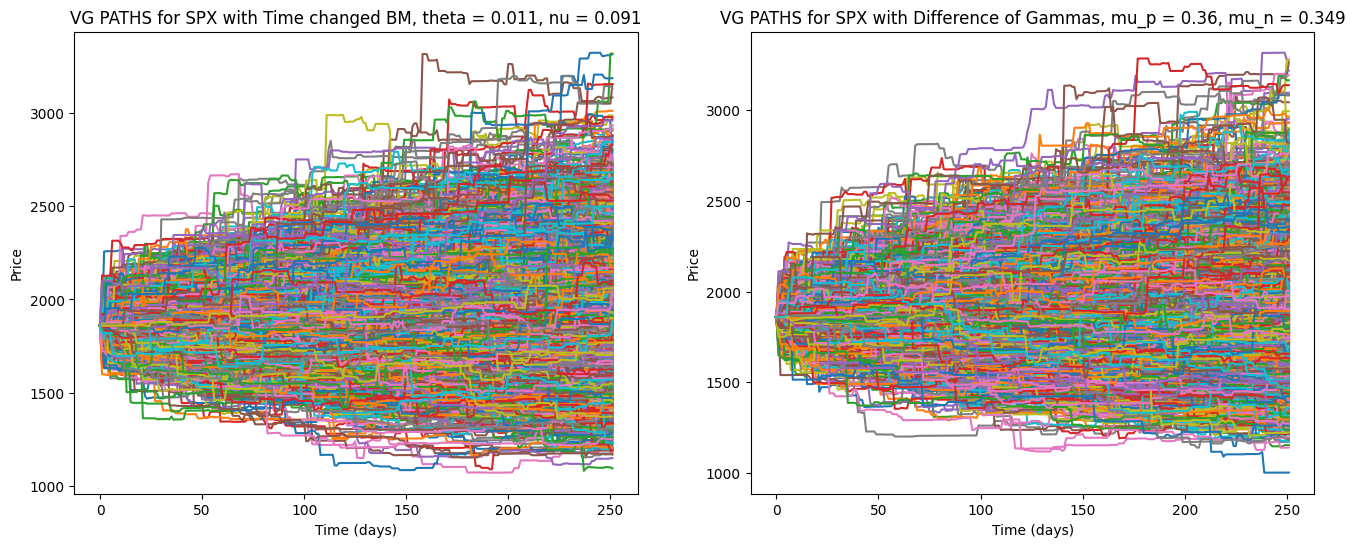

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [22]:
# vg_params = [0.3, -0.01, 0.2]
sigma, theta, nu = vg_params

VG = VG_pricer(S0, None, T, r, q, sigma, theta, nu, exercise)
SVarGamma = VG.VarianceGammaPath1(days, paths)
SVarGamma2 = VG.VarianceGammaPath2(days, paths)

method = ['Time changed BM', 'Difference of Gammas']

# Plot all paths
fig1, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
VG.plotVGPath(SVarGamma, symbol, method[0], ax=axes[0])
VG.plotVGPath(SVarGamma2, symbol, method[1], ax=axes[1])
plt.tight_layout()

In [23]:
avg_final_value = SVarGamma[251,:].mean()
print(f'VG Jump Diffusion SPX value after 252 days: {avg_final_value}')

# Pass one by one path to the otko_payoff function. Returns an array of size (paths)
avg_payoffs = []
for K1, K2 in strikes:
    payoffs = []        # stores here the payoff for each path, for a specific couple K1-K2
    for path in SVarGamma2.T:
        payoffs.append(VG.payoff_otko(path,K1, K2))
    avg_payoffs.append(np.mean(payoffs))

vg_mc_prices = np.zeros(len(th_prices))
vg_prices_cf = np.zeros(len(th_prices))

for index in range(len(th_prices)):
    vg_mc_prices[index] = np.exp(-r*T)* avg_payoffs[index]*100
for i, (K1, K2) in enumerate(zip(otko_spx['K1'].values, otko_spx['K2'].values)):
    vg_prices_cf[i] = VG.closed_formula_otko6(K1/100, K2/100)

th_prices['VG CF (%)'] = vg_prices_cf
th_prices['VG MC (%)'] = vg_mc_prices
print(th_prices)

VG Jump Diffusion SPX value after 252 days: 1919.5237529514127
   K1  K2  Midpoint (%)  KOU CF (%)  KOU MC (%)  VG CF (%)  VG MC (%)
0  75   0         0.185    0.183106    0.085512   0.000263   0.000409
1  70   0         0.090    0.101838    0.036463   0.000023   0.000000
2  85  75         0.370    0.347975    0.265341   0.024118   0.018014
3  80  70         0.260    0.215319    0.143884   0.002629   0.001977
4  90  80         0.510    0.546475    0.471661   0.203877   0.198387


The maximum number of function evaluations is exceeded.
Function evaluations 300, initial cost 5.0428e+03, final cost 2.7569e+00, first-order optimality 5.53e+01.
METHOD 1: LEAST-SQUARES (trf)
> Calibrated Volatlity [σ] = 0.1216, 	 12.16%
> Calibrated mean rate gamma process [θ] =  -0.0843
> Calibrated variance rate gamma process [v]=  0.715
CALIBRATED PARAMETERS: [σ 		θ		 v]
> European CALLS:	 [0.151, 0.0107, 0.0909]
> OTKO DC:			 [0.1216, -0.0843, 0.715]


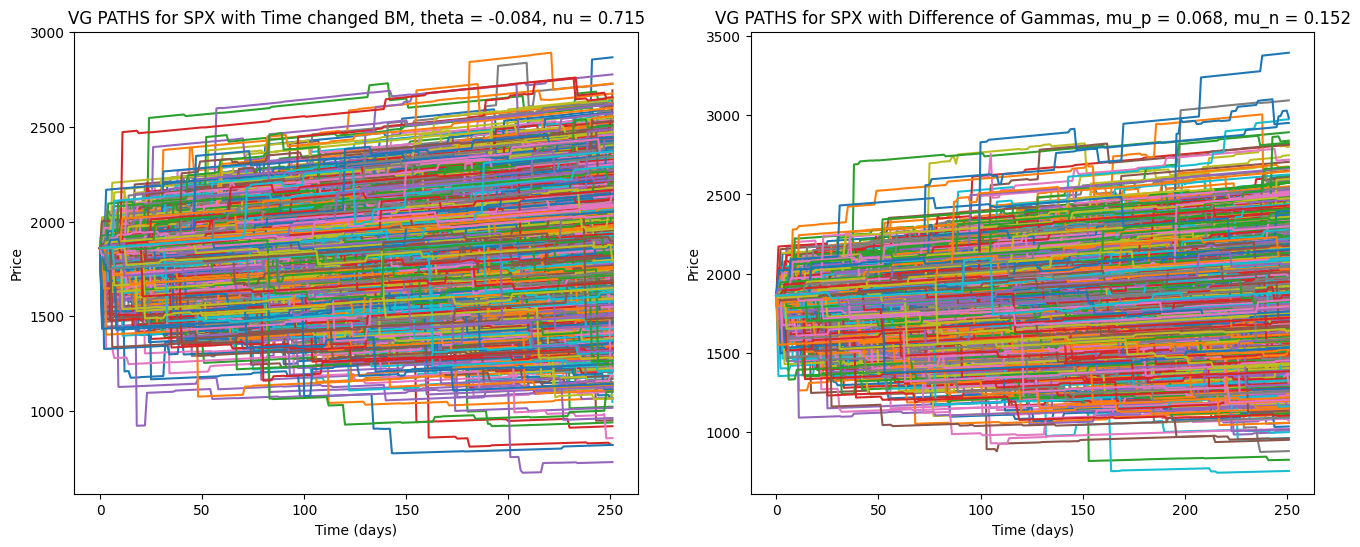

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [24]:
x0 = [0.2, -0.2, 0.02] # initial guess: [σ, θ, v]
#x0 = vg_params
bounds = ([1e-3, -5, 0], [0.6, 0.4, 4])
spreads =  otko_spx['ASK(%)'] - otko_spx['BID(%)']
weights = 1/spreads**2
mkt_prices = otko_spx['Midpoint (%)'].values

def cost_function(x, strikes, mkt_prices):
    sigma, theta, nu = x
    VG = VG_pricer(S0, None, T, r, q, sigma, theta, nu, exercise)
    sq_err = 0
    for k in [0,1,3]:
        sq_err += weights[k] * (VG.closed_formula_otko6(strikes[k][0], strikes[k][1]) - mkt_prices[k]) ** 2
    return sq_err

vg = scpo.least_squares(cost_function, x0, args=(strikes, mkt_prices), method='trf', bounds=bounds, verbose=1)

vg_params_calibrated = [round(p, 4) for p in vg.x[:3]]
print('METHOD 1: LEAST-SQUARES (trf)')
print(f'> Calibrated Volatlity [σ] = {vg_params_calibrated[0]}, \t {round(vg_params_calibrated[0] * 100, 2)}%')
print('> Calibrated mean rate gamma process [θ] = ', vg_params_calibrated[1])
print('> Calibrated variance rate gamma process [v]= ', vg_params_calibrated[2])
print(f'CALIBRATED PARAMETERS: [σ \t\tθ\t\t v]')
print(f'> European CALLS:\t {vg_params}')
print(f'> OTKO DC:\t\t\t {vg_params_calibrated}')
sigma, theta, nu = vg_params_calibrated

VG_CAL = VG_pricer(S0, None, T, r, q, sigma, theta, nu, exercise)
SVarGamma_cal = VG_CAL.VarianceGammaPath1(days, paths)
SVarGamma2_cal = VG_CAL.VarianceGammaPath2(days, paths)

method = ['Time changed BM', 'Difference of Gammas']

# Plot all paths
fig1, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
VG_CAL.plotVGPath(SVarGamma_cal, symbol, method[0], ax=axes[0])
VG_CAL.plotVGPath(SVarGamma2_cal, symbol, method[1], ax=axes[1])
plt.tight_layout()


In [25]:
# Pass one by one path to the otko_payoff function. Returns an array of size (paths)
avg_payoffs = []
for K1, K2 in strikes:
    payoffs = []        # stores here the payoff for each path, for a specific couple K1-K2
    for path in SVarGamma2_cal.T:
        payoffs.append(VG_CAL.payoff_otko(path,K1, K2))
    avg_payoffs.append(np.mean(payoffs))

vg_mc_prices = np.zeros(len(th_prices))
vg_prices_cf = np.zeros(len(th_prices))

for index in range(len(th_prices)):
    vg_mc_prices[index] = np.exp(-r*T)* avg_payoffs[index]*100
for i, (K1, K2) in enumerate(zip(otko_spx['K1'].values, otko_spx['K2'].values)):
    vg_prices_cf[i] = VG_CAL.closed_formula_otko6(K1/100, K2/100)

th_prices['VG CF (%)'] = vg_prices_cf
th_prices['VG MC (%)'] = vg_mc_prices
print(th_prices)

   K1  K2  Midpoint (%)  KOU CF (%)  KOU MC (%)  VG CF (%)  VG MC (%)
0  75   0         0.185    0.183106    0.085512   0.168324   0.162761
1  70   0         0.090    0.101838    0.036463   0.072527   0.067047
2  85  75         0.370    0.347975    0.265341   0.650066   0.663902
3  80  70         0.260    0.215319    0.143884   0.305190   0.308088
4  90  80         0.510    0.546475    0.471661   1.332358   1.351131


In [26]:
# Day-by-day mean of the 1000 paths, for each model
daily_avg = pd.DataFrame(columns=['BlackScholes', 'Merton', 'Kou', 'VarGamma1', 'VarGamma2'])
#daily_avg['Days'] = np.linspace(0,251,1)

daily_avg['BlackScholes'] = SBlackScholes.mean(axis=1)
daily_avg['Merton'] = SMerton.mean(axis=1)
daily_avg['Kou'] = SKou.mean(axis=1)
daily_avg['VarGamma1'] = SVarGamma.mean(axis=1)
daily_avg['VarGamma2'] = SVarGamma2.mean(axis=1)
print(daily_avg.tail())



     BlackScholes       Merton          Kou    VarGamma1    VarGamma2
247   1918.589890  1930.000030  1933.506134  1917.980911  1911.870800
248   1919.306390  1930.374104  1933.574512  1918.455950  1912.139916
249   1918.797757  1931.168399  1934.050721  1919.124292  1912.436298
250   1919.308920  1931.252047  1934.540308  1919.414057  1912.463977
251   1919.852828  1931.597925  1934.935738  1919.523753  1912.988780


In [27]:
# TODO: COSA è LA DERIVA VERSO IL BASSO? controlla formule

St = S0 * np.exp(r * T)
print(St)

# Calculate the daily growth factor
daily_growth_factor = np.exp(r / days)

# Calculate the growth of prices day by day
St = S0 * np.cumprod(np.full(days, daily_growth_factor))

fig1 = go.Figure()
for column in daily_avg.columns:
    fig1.add_trace(go.Scatter(x=spx_data.loc[0:251, 'Date'], y=daily_avg[column], name=column))
fig1.add_trace(go.Scatter(x = spx_data.loc[0:251, 'Date'], y = St, name='Risk-free Growth'))

# Update the layout
fig1.update_layout(
    xaxis_title='Date',
    yaxis_title='Price',
    title = 'Real vs Simulated SPX paths',
    showlegend=True
)

# Show the plot
pio.show(fig1)

### MERTON DRIFT!!!
### CAPIRE KOU e VG come aggiustare drift

1915.9549833321462
